#### Load Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('data.csv') #openpyxl error 

df.sample(5)

,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price
4825,SI_004826,CityC,1864.0,3.0,1.0,1937.0,Fair,Single Family,24-07-2021,421000.0
217140,TO_069969,CityD,3995.0,1.0,2.0,1915.0,Good,Townhouse,01-06-2024,307000.0
92629,CO_004369,CityA,3276.0,4.0,1.0,1942.0,Good,Condominium,13-06-2021,355000.0
243530,TO_096359,CityD,2361.0,2.0,2.0,1907.0,Good,Townhouse,08-04-2023,437000.0
218451,TO_071280,CityD,2554.0,2.0,2.0,1990.0,Good,Townhouse,13-02-2023,370000.0


In [3]:
df.shape

(247172, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Property ID  247172 non-null  object 
 1   Location     247172 non-null  object 
 2   Size         244701 non-null  float64
 3   Bedrooms     238769 non-null  float64
 4   Bathrooms    240499 non-null  float64
 5   Year Built   234567 non-null  float64
 6   Condition    236544 non-null  object 
 7   Type         247172 non-null  object 
 8   Date Sold    247172 non-null  object 
 9   Price        241735 non-null  float64
dtypes: float64(5), object(5)
memory usage: 18.9+ MB


In [5]:
df.isnull().sum()

Property ID        0
Location           0
Size            2471
Bedrooms        8403
Bathrooms       6673
Year Built     12605
Condition      10628
Type               0
Date Sold          0
Price           5437
dtype: int64

In [6]:
df.describe()

,Size,Bedrooms,Bathrooms,Year Built,Price
count,244701.000000,238769.000000,240499.000000,234567.000000,2.417350e+05
mean,2402.547664,3.000457,2.002823,1961.429191,4.660883e+05
std,923.418566,1.415088,0.816616,35.752638,2.315026e+05
min,800.000000,1.000000,1.000000,1900.000000,2.600000e+04
25%,1603.000000,2.000000,1.000000,1931.000000,3.000000e+05
50%,2404.000000,3.000000,2.000000,1961.000000,4.170000e+05
75%,3203.000000,4.000000,3.000000,1992.000000,5.770000e+05
max,3999.000000,5.000000,3.000000,2023.000000,2.223000e+06


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# df.iloc[:, 1 : ].corr()['Price']
df.select_dtypes(include='number').iloc[:, 1:].corr()['Price']

Bedrooms      0.162446
Bathrooms     0.057608
Year Built   -0.030181
Price         1.000000
Name: Price, dtype: float64

In [9]:
df.rename(columns={
    'Year Built': 'YearBuilt',
    'Date Sold'     : 'DateSold'
},
inplace=True)
# df.sample(2)

#### Handling missing values 


In [10]:
#percentage of values missing 
missing_counts = df.isnull().sum()
missing_percent = (missing_counts /len(df)) * 100
missing_percent 

Property ID    0.000000
Location       0.000000
Size           0.999709
Bedrooms       3.399657
Bathrooms      2.699739
YearBuilt      5.099688
Condition      4.299840
Type           0.000000
DateSold       0.000000
Price          2.199683
dtype: float64

In [11]:
#drop rows where data  is missing  < 4%
df = df.dropna(subset= ['Size'])
# df['Size'].isnull().sum() -> 0

#percentage of values missing 
missing_counts = df.isnull().sum()
missing_percent = (missing_counts /len(df)) * 100
missing_percent 




Property ID    0.000000
Location       0.000000
Size           0.000000
Bedrooms       2.424183
Bathrooms      1.717198
YearBuilt      4.141381
Condition      3.333456
Type           0.000000
DateSold       0.000000
Price          1.212091
dtype: float64

In [12]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.04 and df[var].isnull().mean() > 0]

cols

['Bedrooms', 'Bathrooms', 'Condition', 'Price']

In [13]:
#% data remaining 
len(df[cols].dropna())/len(df)

0.9666654406806674

In [14]:
new_df = df[cols].dropna()
(new_df.shape, df.shape)

((236544, 4), (244701, 10))

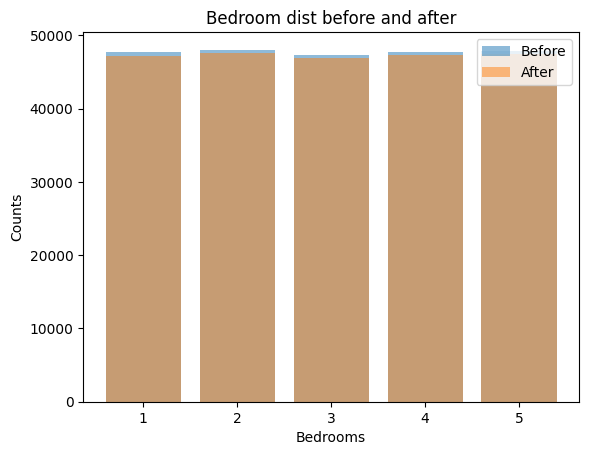

In [15]:
#plot  to see distribution changes 

# for bedrooms cols
before = df['Bedrooms'].value_counts().sort_index()
after = new_df['Bedrooms'].value_counts().sort_index()

plt.bar(before.index, before.values, alpha = 0.5, label = 'Before')
plt.bar(after.index, after.values, alpha = 0.5, label = 'After')

plt.xlabel('Bedrooms')
plt.ylabel('Counts')
plt.title('Bedroom dist before and after')
plt.legend()
plt.show()

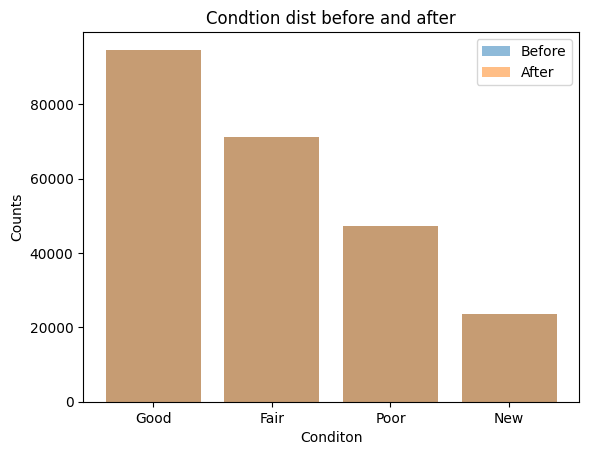

In [16]:
#for condition cols
before = df['Condition'].value_counts()
after = new_df['Condition'].value_counts()

plt.bar(before.index, before.values, alpha = 0.5, label = 'Before')
plt.bar(after.index, after.values, alpha = 0.5, label = 'After')

plt.xlabel('Conditon')
plt.ylabel('Counts')
plt.title('Condtion dist before and after')
plt.legend()
plt.show()


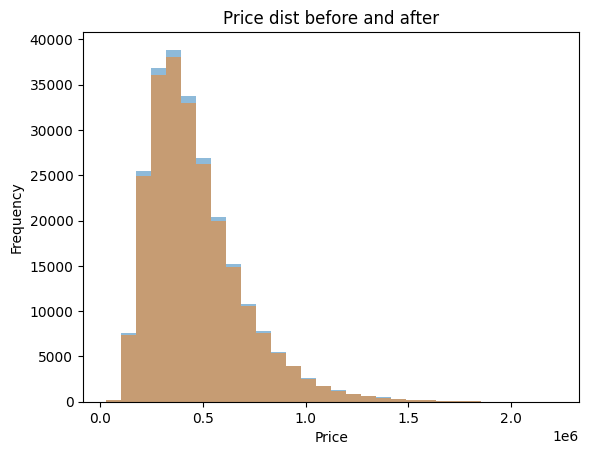

In [17]:
#for price col
plt.hist(df['Price'], bins= 30, alpha = 0.5, label = 'Before')
plt.hist(new_df['Price'], bins = 30, alpha = 0.5, label ='After')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price dist before and after')
plt.show()

In [18]:
# merge data frames 
merged = pd.concat(
    [new_df, df.drop(columns = new_df.columns)],
    axis= 1,
    join= 'inner'
)

merged.shape


(236544, 10)

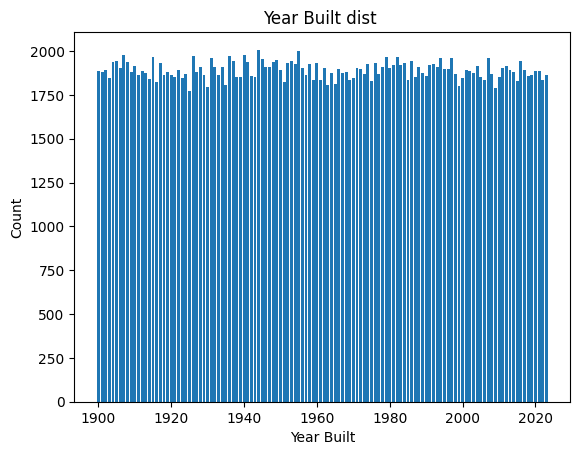

In [19]:
#year built cols 
counts = merged['YearBuilt'].value_counts().sort_values(ascending=False)
plt.bar(counts.index, counts.values, label = 'counts')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Year Built dist ')
plt.show()

In [20]:
#impute randomly as distribution is very uniform 
existing_years = merged['YearBuilt'].dropna().values
# existing_years
merged['YearBuilt'] = merged['YearBuilt'].apply(lambda x : np.random.choice(existing_years) if pd.isna(x) else x)

In [21]:
merged.isna().sum()

Bedrooms       0
Bathrooms      0
Condition      0
Price          0
Property ID    0
Location       0
Size           0
YearBuilt      0
Type           0
DateSold       0
dtype: int64

In [22]:
# sns.countplot(merged['Bedrooms'])

<Axes: xlabel='Bedrooms'>

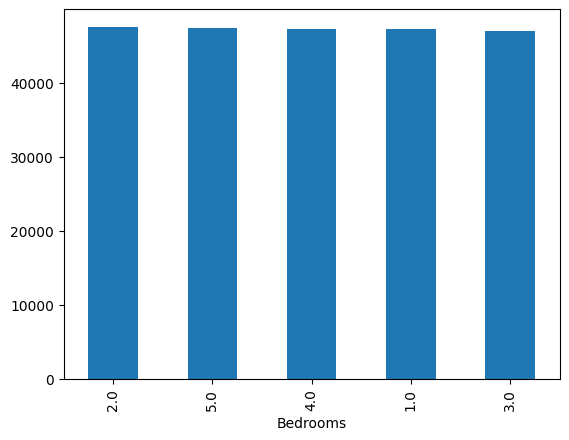

In [23]:
merged['Bedrooms'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Bathrooms'>

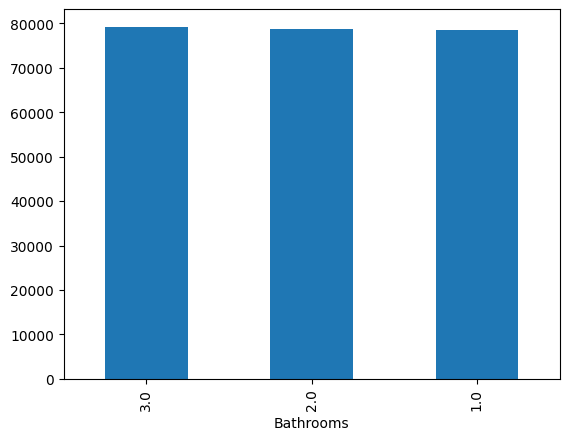

In [24]:
merged['Bathrooms'].value_counts().plot(kind = 'bar')


<Axes: xlabel='Condition'>

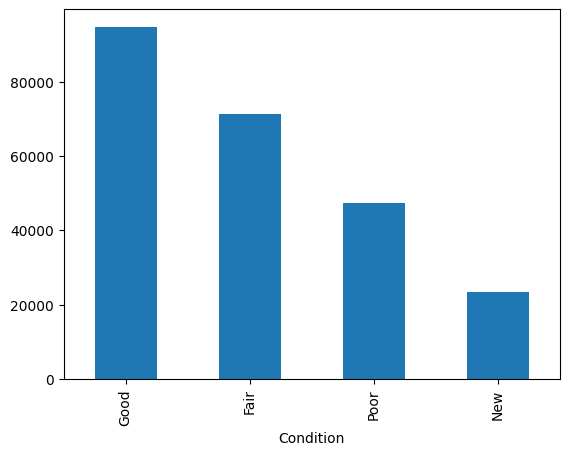

In [25]:
merged['Condition'].value_counts().plot(kind = 'bar')


In [26]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236544 entries, 0 to 247171
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Bedrooms     236544 non-null  float64
 1   Bathrooms    236544 non-null  float64
 2   Condition    236544 non-null  object 
 3   Price        236544 non-null  float64
 4   Property ID  236544 non-null  object 
 5   Location     236544 non-null  object 
 6   Size         236544 non-null  float64
 7   YearBuilt    236544 non-null  float64
 8   Type         236544 non-null  object 
 9   DateSold     236544 non-null  object 
dtypes: float64(5), object(5)
memory usage: 19.9+ MB


#### Some graphs

<Axes: xlabel='Location'>

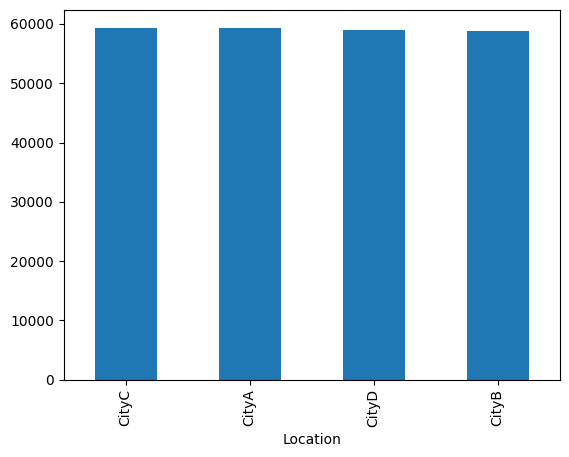

In [27]:
#location unique 
merged['Location'].unique()
merged['Location'].value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: ylabel='count'>

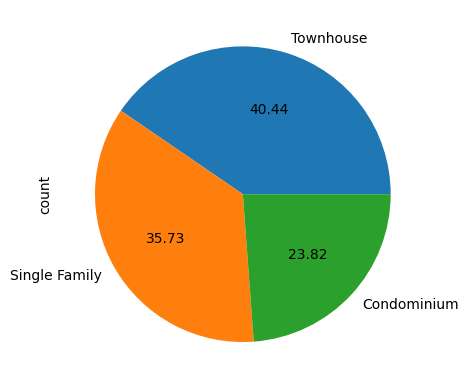

In [28]:
#dsitrbution by type 
merged['Type'].value_counts().plot(kind='pie', autopct = '%.2f')

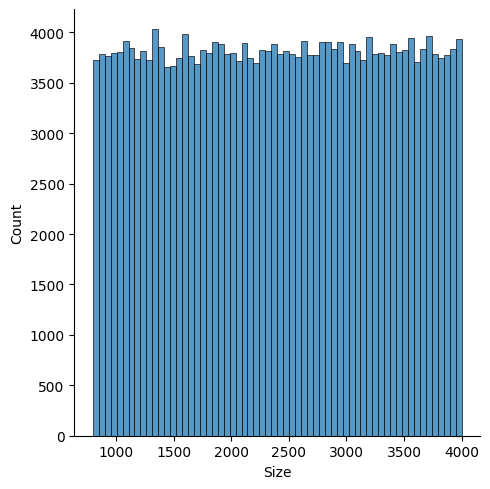

In [29]:
#size of house distribution
sns.displot(merged['Size'])

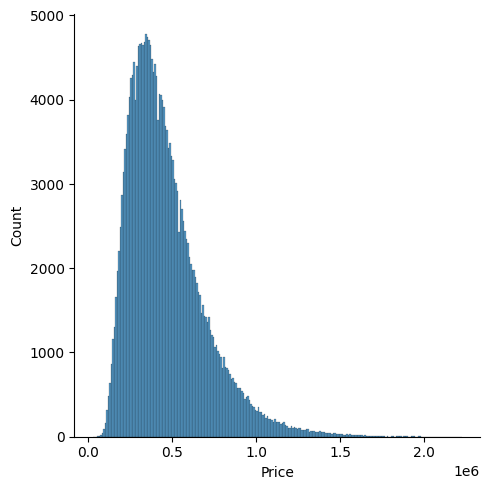

In [30]:
# price col 
sns.displot(merged['Price'])

<Axes: ylabel='Price'>

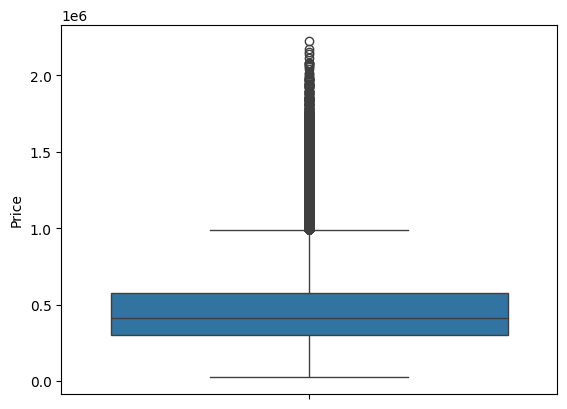

In [31]:
sns.boxplot(merged['Price'])
#although it has outliers on higher price range , but luxury real estate is a reality 

#### Identifying relationship bewtween cols 

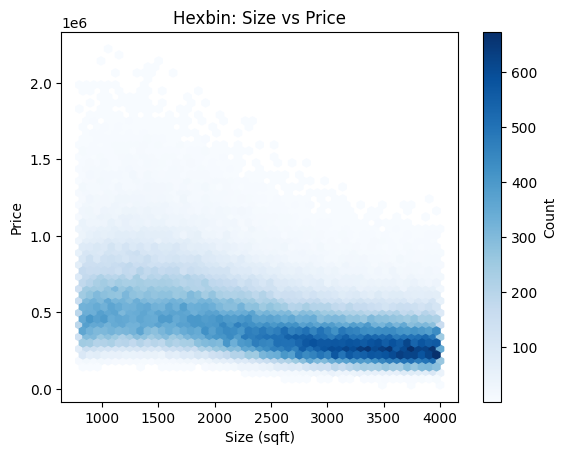

In [32]:
#b/w size and price 
# sns.scatterplot(x=merged['Size'], y=merged['Price'])
plt.hexbin(df['Size'], df['Price'], gridsize=50, mincnt=1, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('Hexbin: Size vs Price')
plt.show()

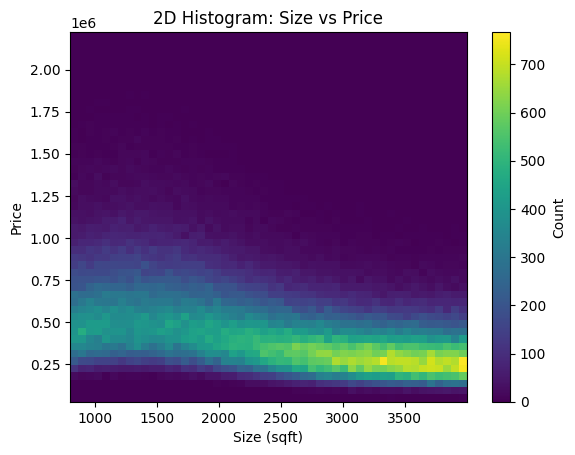

In [33]:
# Filter out rows with NaN values in 'Size' or 'Price'
filtered_df = df.dropna(subset=['Size', 'Price'])

plt.hist2d(filtered_df['Size'], filtered_df['Price'], bins=50)
plt.colorbar(label='Count')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('2D Histogram: Size vs Price')
plt.show()

<Axes: xlabel='Location', ylabel='Price'>

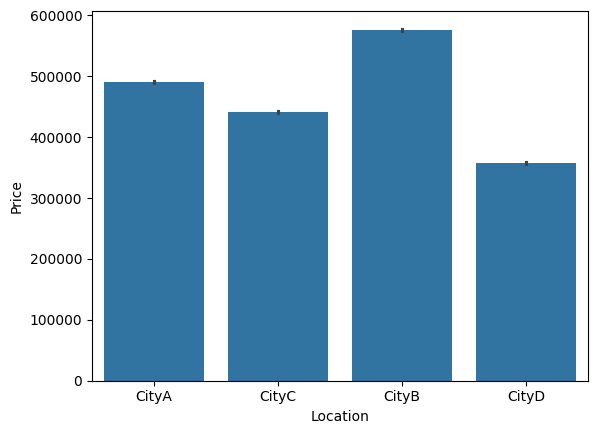

In [34]:
#b/w city and prices 
sns.barplot(x = merged['Location'], y = merged['Price'])

<Axes: xlabel='Type', ylabel='Price'>

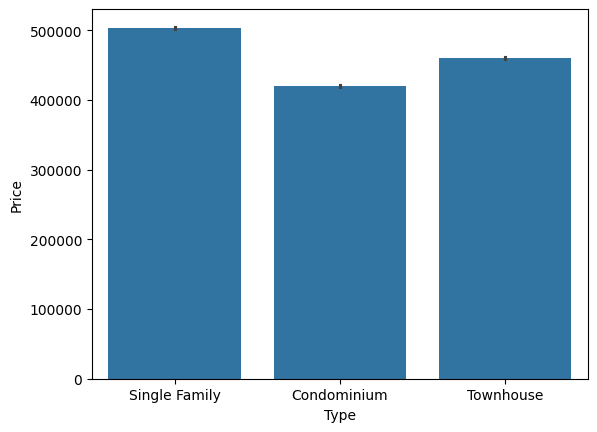

In [35]:
#b/w type and price 
sns.barplot(x = merged['Type'], y = merged['Price'])
# avg_price_per_type = merged.groupby('Type')['Price'].mean().sort_values()
# avg_price_per_type



In [36]:
# b/w datesold and price 
merged.sample(3)

,Bedrooms,Bathrooms,Condition,Price,Property ID,Location,Size,YearBuilt,Type,DateSold
197767,3.0,1.0,Good,345000.0,TO_050596,CityD,2159.0,2018.0,Townhouse,24-03-2021
188217,4.0,2.0,Good,476000.0,TO_041046,CityC,3336.0,1972.0,Townhouse,06-05-2023
63467,5.0,2.0,Fair,381000.0,SI_063468,CityC,2029.0,1969.0,Single Family,12-04-2021


<Axes: xlabel='Condition'>

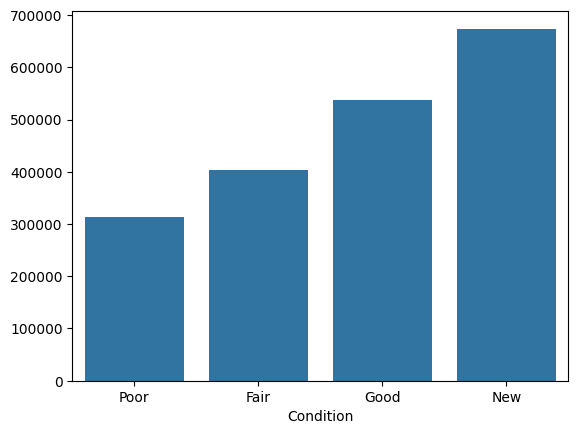

In [37]:
#by condition 
cond_means = merged.groupby('Condition')['Price'].mean().sort_values()
# cond_means.values.astype(int)
sns.barplot(x = cond_means.index , y = cond_means.values)

<Axes: xlabel='DateSold'>

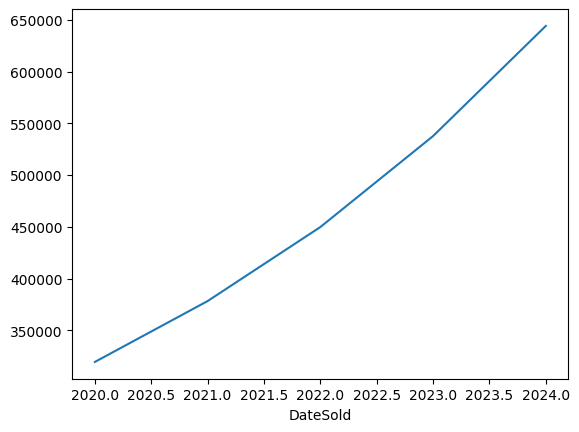

In [38]:
#market trends by date 

years  = pd.to_datetime(merged['DateSold'], format = '%d-%m-%Y').dt.year
yearlyAvg = merged.groupby(years)['Price'].mean()

sns.lineplot(x = yearlyAvg.index, y = yearlyAvg.values)

#### Feature Engineering 

In [39]:
temp = merged.copy()

In [40]:
temp['DateSold'] = pd.to_datetime(temp['DateSold'], format = '%d-%m-%Y')
temp['SoldYear'] = temp['DateSold'].dt.year
temp['MonthSold'] = temp['DateSold'].dt.month
temp['QuarterSold'] = temp['DateSold'].dt.quarter
temp['SoldDayofWeek'] = temp['DateSold'].dt.day_of_week

temp['HouseAge'] = temp['SoldYear'] - temp['YearBuilt']

#check coorelation 
correaltion = temp[['SoldYear', 'MonthSold', 'QuarterSold', 'SoldDayofWeek', 'HouseAge', 'Price']].corr()['Price'].sort_values(ascending=False)
print(correaltion)

# soldday-> no meaningful relation 

Price            1.000000
SoldYear         0.494302
MonthSold        0.100928
QuarterSold      0.097575
HouseAge         0.049359
SoldDayofWeek    0.003725
Name: Price, dtype: float64


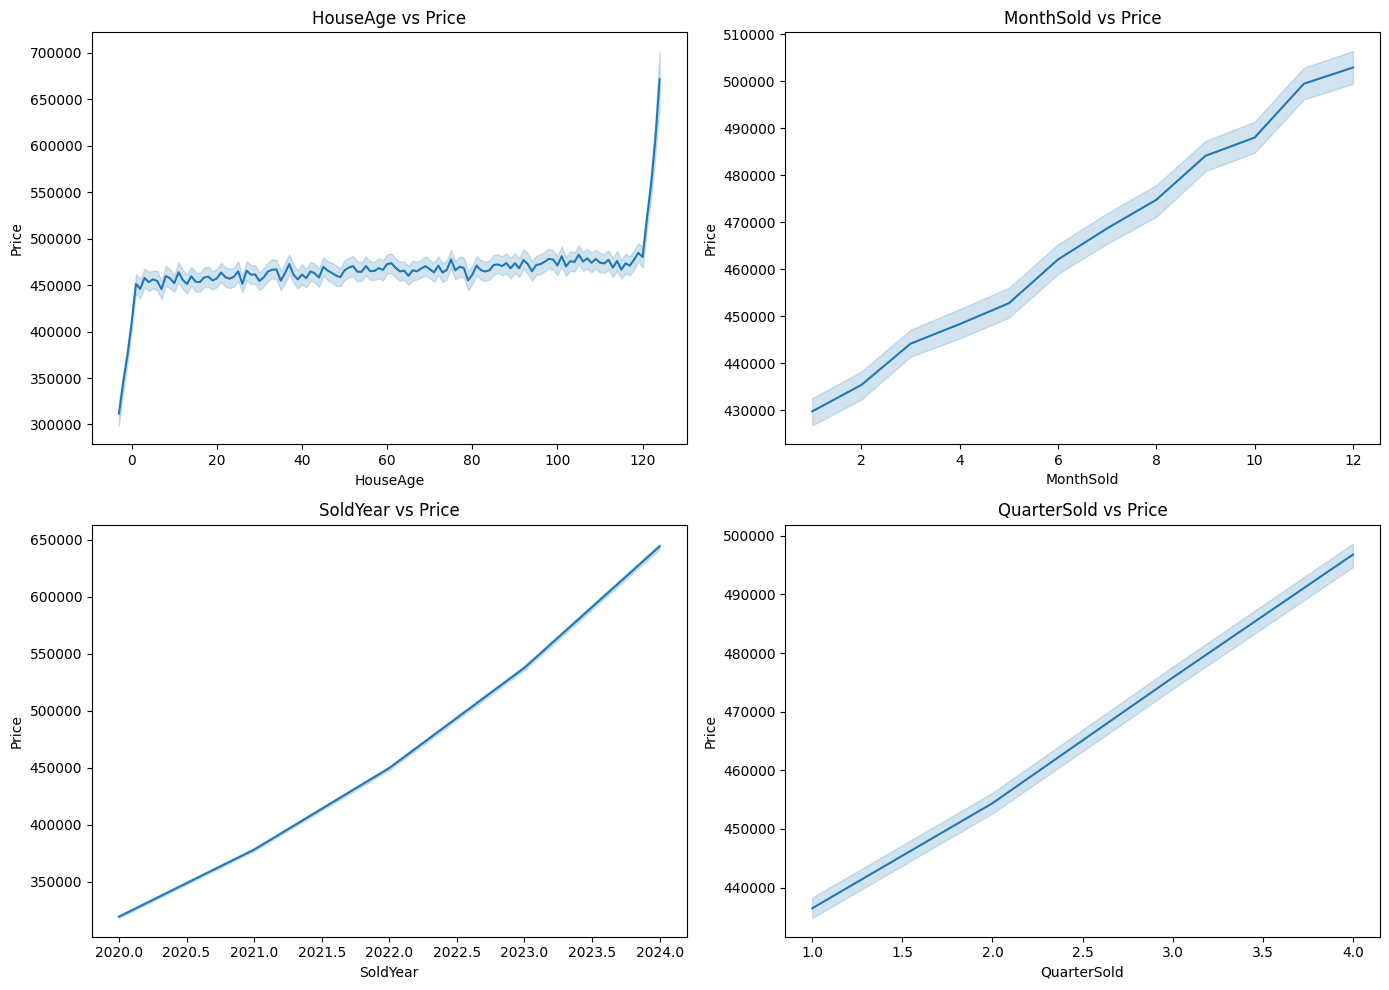

In [41]:
fig, axs = plt.subplots(2,2,figsize = (14,10))

#houseAge 
sns.lineplot(data = temp, x = 'HouseAge', y = 'Price', estimator= 'mean', ax = axs[0,0])
axs[0,0].set_title('HouseAge vs Price')
#MonthSold
sns.lineplot(data = temp, x = 'MonthSold', y = 'Price', estimator= 'mean', ax = axs[0,1])
axs[0,1].set_title('MonthSold vs Price')
#SoldYear
sns.lineplot(data = temp, x = 'SoldYear', y = 'Price', estimator= 'mean', ax = axs[1,0])
axs[1,0].set_title('SoldYear vs Price')
#QuarterSold
sns.lineplot(data = temp, x = 'QuarterSold', y = 'Price', estimator= 'mean', ax = axs[1,1])
axs[1,1].set_title('QuarterSold vs Price')

plt.tight_layout()
plt.show()


In [42]:
#drop house age , quarter 
temp = temp.drop(columns=['HouseAge', 'QuarterSold'])


In [43]:
temp = temp.drop(columns='SoldDayofWeek')
temp.sample(2)

,Bedrooms,Bathrooms,Condition,Price,Property ID,Location,Size,YearBuilt,Type,DateSold,SoldYear,MonthSold
230842,4.0,3.0,Good,430000.0,TO_083671,CityB,2281.0,1979.0,Townhouse,2020-11-05,2020,11
236270,4.0,1.0,Fair,189000.0,TO_089099,CityC,3025.0,2000.0,Townhouse,2020-01-22,2020,1


In [44]:
#price per sqft
temp['PricePerSqft'] = temp['Price'] / temp['Size']
temp.sample(3)

,Bedrooms,Bathrooms,Condition,Price,Property ID,Location,Size,YearBuilt,Type,DateSold,SoldYear,MonthSold,PricePerSqft
104896,5.0,1.0,New,448000.0,CO_016636,CityD,1450.0,1931.0,Condominium,2020-04-16,2020,4,308.965517
118407,5.0,2.0,Fair,287000.0,CO_030147,CityC,3211.0,2004.0,Condominium,2022-02-02,2022,2,89.380255
225204,1.0,3.0,Good,753000.0,TO_078033,CityB,1419.0,1998.0,Townhouse,2022-04-29,2022,4,530.655391


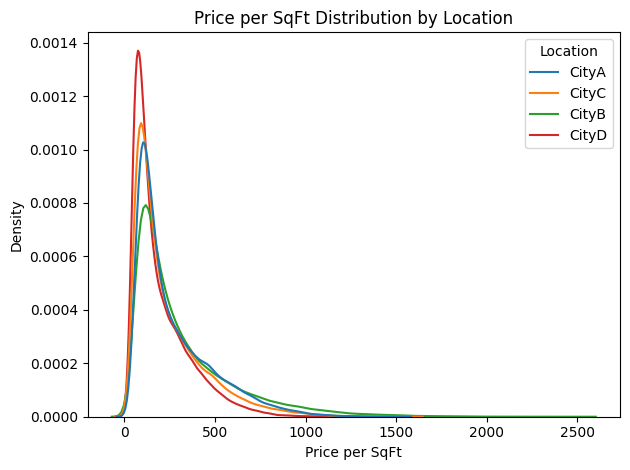

In [45]:
sns.kdeplot(data=temp, x='PricePerSqft', hue='Location', fill=False)
plt.xlabel("Price per SqFt")
plt.title("Price per SqFt Distribution by Location")
plt.tight_layout()
plt.show()

In [46]:
#combining bathroom + bedroom in total_rooms
temp['TotalRooms'] = temp['Bathrooms'] + temp['Bedrooms']
temp.sample(3)

,Bedrooms,Bathrooms,Condition,Price,Property ID,Location,Size,YearBuilt,Type,DateSold,SoldYear,MonthSold,PricePerSqft,TotalRooms
196272,2.0,2.0,Poor,442000.0,TO_049101,CityA,899.0,1915.0,Townhouse,2023-06-11,2023,6,491.657397,4.0
10263,3.0,2.0,Poor,120000.0,SI_010264,CityD,2988.0,1993.0,Single Family,2020-06-30,2020,6,40.160643,5.0
192873,4.0,3.0,Poor,293000.0,TO_045702,CityC,1219.0,1910.0,Townhouse,2020-12-11,2020,12,240.360952,7.0


In [47]:
#standardize values  of numeric cols 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

temp[['Size', 'PricePerSqft']] = scaler.fit_transform(temp[['Size', 'PricePerSqft']])




In [48]:
pd.options.display.float_format = '{:,.6f}'.format
temp[['Size', 'PricePerSqft']].describe()

,Size,PricePerSqft
count,"236,544.000000","236,544.000000"
mean,0.000000,0.000000
std,1.000002,1.000002
min,-1.735627,-1.139825
25%,-0.866082,-0.701161
50%,0.001297,-0.355681
75%,0.866510,0.390454
max,1.728475,10.228656


<Axes: xlabel='YearBuilt', ylabel='Price'>

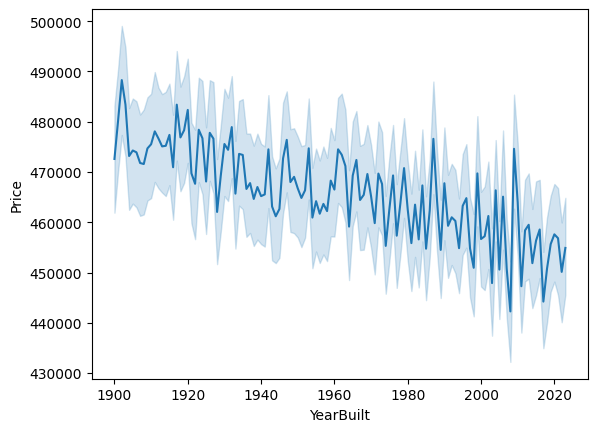

In [49]:
sns.lineplot(data= temp, x='YearBuilt', y = 'Price')

In [50]:
#encoding categorical columsn like condtion, locatio, type
df_encoded = pd.get_dummies(temp, columns=['Condition', 'Location', 'Type'], drop_first=False)


In [51]:
# df_encoded.sample(3)
(temp.shape, df_encoded.shape)

((236544, 14), (236544, 22))

In [52]:
#log transform the target variable 
df_encoded['LogPrice'] = np.log(df_encoded['Price'])

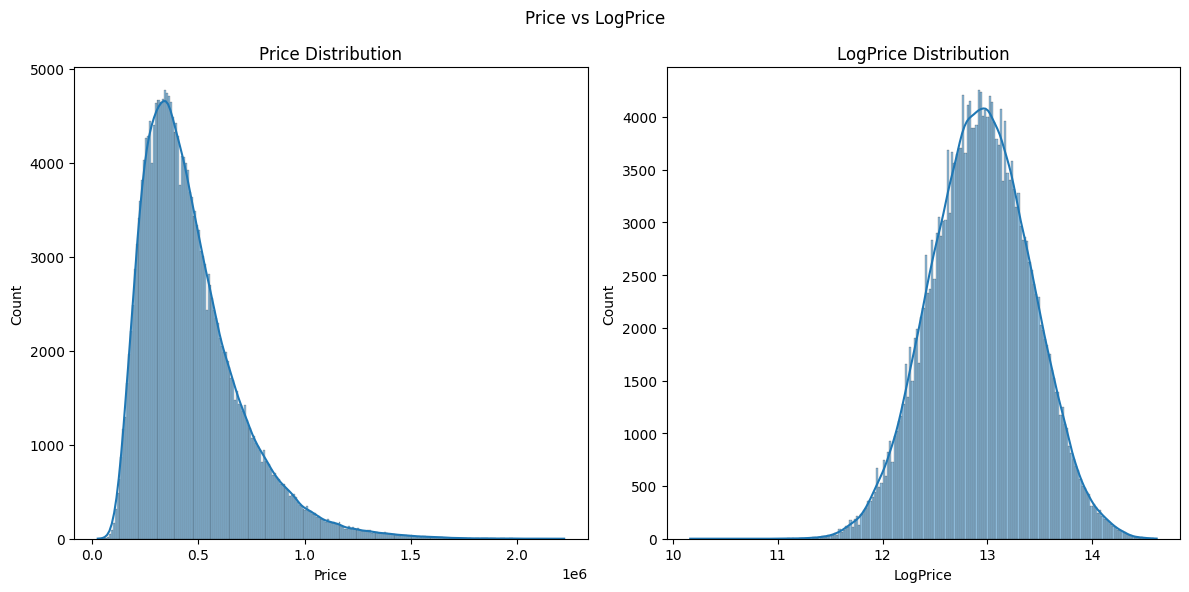

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Price distribution
sns.histplot(df_encoded['Price'], ax=axs[0], kde=True)
axs[0].set_title('Price Distribution')

# Plot LogPrice distribution
sns.histplot(df_encoded['LogPrice'], ax=axs[1], kde=True)
axs[1].set_title('LogPrice Distribution')

plt.suptitle('Price vs LogPrice')
plt.tight_layout()
plt.show()

In [54]:
df_encoded.sample(3)

,Bedrooms,Bathrooms,Price,Property ID,Size,YearBuilt,DateSold,SoldYear,MonthSold,PricePerSqft,...,Condition_New,Condition_Poor,Location_CityA,Location_CityB,Location_CityC,Location_CityD,Type_Condominium,Type_Single Family,Type_Townhouse,LogPrice
244646,2.000000,3.000000,"748,000.000000",TO_097475,0.308832,"1,955.000000",2023-01-01,2023,1,0.094753,...,True,False,False,True,False,False,False,False,True,13.525158
1450,2.000000,3.000000,"420,000.000000",SI_001451,1.050598,"1,969.000000",2024-07-27,2024,7,-0.603817,...,False,False,False,False,True,False,False,True,False,12.948010
109928,3.000000,3.000000,"305,000.000000",CO_021668,0.238445,"1,905.000000",2021-06-23,2021,6,-0.641250,...,False,False,False,False,False,True,True,False,False,12.628067


#### Model Training:

In [55]:
#feature selection:
df_model = df_encoded.drop(['Property ID',  'DateSold', 'Price'], axis=1)

In [56]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236544 entries, 0 to 247171
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Bedrooms            236544 non-null  float64
 1   Bathrooms           236544 non-null  float64
 2   Size                236544 non-null  float64
 3   YearBuilt           236544 non-null  float64
 4   SoldYear            236544 non-null  int32  
 5   MonthSold           236544 non-null  int32  
 6   PricePerSqft        236544 non-null  float64
 7   TotalRooms          236544 non-null  float64
 8   Condition_Fair      236544 non-null  bool   
 9   Condition_Good      236544 non-null  bool   
 10  Condition_New       236544 non-null  bool   
 11  Condition_Poor      236544 non-null  bool   
 12  Location_CityA      236544 non-null  bool   
 13  Location_CityB      236544 non-null  bool   
 14  Location_CityC      236544 non-null  bool   
 15  Location_CityD      236544 non-null  bo

In [57]:
from sklearn.model_selection import train_test_split

X = df_model.drop(['LogPrice'], axis= 1)
y = df_model['LogPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [59]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (189235, 19)
Testing data shape: (47309, 19)


In [60]:
#random forrest 
print("Training random forest model: ")
start_time = time.time()

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split= 5,
    min_samples_leaf= 2,
    random_state= 42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print(f"RF training completed in {time.time() - start_time} seconds")

Training random forest model: 
RF training completed in 23.408318519592285 seconds


In [61]:
#xgboost 
print('Training xgboost :')
start_time = time.time()
xgb_model = xgb.XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 10,
    subsample = 0.8,
    colsample_bytree= 0.8,
    random_state = 42,
    n_jobs = -1
)

xgb_model.fit(X_train, y_train)
print(f"XGB training completed in {time.time() - start_time} seconds")

Training xgboost :
XGB training completed in 2.4157238006591797 seconds


In [62]:
#lightbgm 
print("Training lightBgm : ")
start_time = time.time()
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train, y_train)
print(f"LGB training completed in {time.time() - start_time} seconds")

Training lightBgm : 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 189235, number of used features: 19
[LightGBM] [Info] Start training from score 12.939388
LGB training completed in 0.7618718147277832 seconds


In [63]:
models = {
    'RandomForest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

In [64]:
for model_name , model in models.items() : 
    y_train_pred = model.predict(X_train)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    print(f"\n {model_name} Training Performance: ")
    print(f"RMSE (logscale) : {train_rmse}")
    print(f"R2 : {train_r2}")
    
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"\n {model_name} test performance : ")
    print(f"RMSE (Log Scale) : {test_rmse}")
    print(f"R2 : {test_r2}")


 RandomForest Training Performance: 
RMSE (logscale) : 0.009270497062600015
R2 : 0.9996212443024376

 RandomForest test performance : 
RMSE (Log Scale) : 0.013695703849327742
R2 : 0.9991783743876512

 XGBoost Training Performance: 
RMSE (logscale) : 0.007883001154245969
R2 : 0.9997261351382646

 XGBoost test performance : 
RMSE (Log Scale) : 0.013935820799684882
R2 : 0.9991493118907417

 LightGBM Training Performance: 
RMSE (logscale) : 0.023987271045763526
R2 : 0.9974642010462766

 LightGBM test performance : 
RMSE (Log Scale) : 0.025393605001656796
R2 : 0.9971754193747651


In [65]:
#drop price per sqft  and retrain

X_train_filtered = X_train.drop(columns=['PricePerSqft'])
X_test_filtered = X_test.drop(columns=['PricePerSqft'])


print("Training random forest model without PricePerSqft:")
start_time = time.time()
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_filtered, y_train)
print(f"RF training completed in {time.time() - start_time:.2f} seconds")

print('Training xgboost without PricePerSqft:')
start_time = time.time()
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train_filtered, y_train)
print(f"XGB training completed in {time.time() - start_time:.2f} seconds")

print("Training lightGBM without PricePerSqft:")
start_time = time.time()
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgb_model.fit(X_train_filtered, y_train)
print(f"LGB training completed in {time.time() - start_time:.2f} seconds")


models = {
    'RandomForest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

for model_name, model in models.items():
    y_train_pred = model.predict(X_train_filtered)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    print(f"\n{model_name} Training Performance without PricePerSqft:")
    print(f"RMSE (logscale): {train_rmse}")
    print(f"R2: {train_r2}")
    
    y_test_pred = model.predict(X_test_filtered)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"{model_name} Test Performance without PricePerSqft:")
    print(f"RMSE (logscale): {test_rmse}")
    print(f"R2: {test_r2}")



Training random forest model without PricePerSqft:
RF training completed in 16.95 seconds
Training xgboost without PricePerSqft:
XGB training completed in 3.26 seconds
Training lightGBM without PricePerSqft:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 189235, number of used features: 18
[LightGBM] [Info] Start training from score 12.939388
LGB training completed in 3.44 seconds

RandomForest Training Performance without PricePerSqft:
RMSE (logscale): 0.052004360188678864
R2: 0.9880811968097724
RandomForest Test Performance without PricePerSqft:
RMSE (logscale): 0.0717576252985753
R2: 0.9774450757877539

XGBoost Training Performance without PricePerSqft:
RMSE (logscale): 0.053027128416566476
R2: 0.98760

In [ ]:


# comparing with original price col 


# Predict using the best trained model (e.g., XGBoost or RandomForest)
y_test_log_pred = xgb_model.predict(X_test_filtered)  # log(price) predictions


y_test_actual_price = np.exp(y_test)  # True prices
y_test_pred_price = np.exp(y_test_log_pred)  # Predicted prices

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Price': y_test_actual_price,
    'Predicted Price': y_test_pred_price,
    'Difference': y_test_actual_price - y_test_pred_price,
    'Percent Error': 100 * np.abs(y_test_actual_price - y_test_pred_price) / y_test_actual_price
})


print(comparison_df.head(10))


r2_original = r2_score(y_test_actual_price, y_test_pred_price)

print(f"\n--- Evaluation in Original Price Scale ---")
print(f"R2: {r2_original}")


           Actual Price  Predicted Price     Difference  Percent Error
227006   488,000.000000   497,441.031250  -9,441.031250       1.934638
163483   357,000.000000   355,611.875000   1,388.125000       0.388831
211332   503,000.000000   510,137.218750  -7,137.218750       1.418930
41279    652,000.000000   644,722.625000   7,277.375000       1.116162
160983   313,000.000000   285,100.875000  27,899.125000       8.913458
162614   264,000.000000   257,302.031250   6,697.968750       2.537109
132327   234,000.000000   218,773.562500  15,226.437500       6.507025
33966  1,036,000.000000 1,012,501.187500  23,498.812500       2.268225
20036    307,000.000000   294,509.687500  12,490.312500       4.068506
94815    499,000.000000   543,504.562500 -44,504.562500       8.918750

--- Evaluation in Original Price Scale ---
R2: 0.9911568736167747


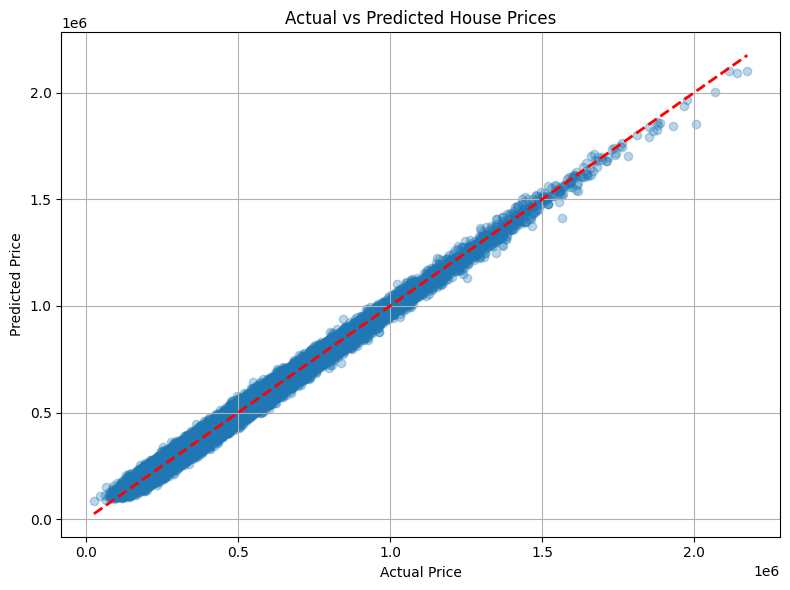

In [77]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual_price, y_test_pred_price, alpha=0.3)
plt.plot([y_test_actual_price.min(), y_test_actual_price.max()],
         [y_test_actual_price.min(), y_test_actual_price.max()],
         'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
#cross validation to confirm 
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Use neg_mean_squared_error because scikit-learn uses negative loss for scoring
cv_scores = cross_val_score(
    xgb_model,
    X_train_filtered,
    y_train,
    scoring='neg_mean_squared_error',
    cv=kfold,
    n_jobs=-1
)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-cv_scores)

print(f"\nXGBoost CV RMSE scores: {rmse_scores}")
print(f"Average CV RMSE: {rmse_scores.mean()}")



XGBoost CV RMSE scores: [0.063645   0.06402101 0.0636055  0.06351491 0.06415754]
Average CV RMSE: 0.06378879220153558


#### Which features matters the most ?

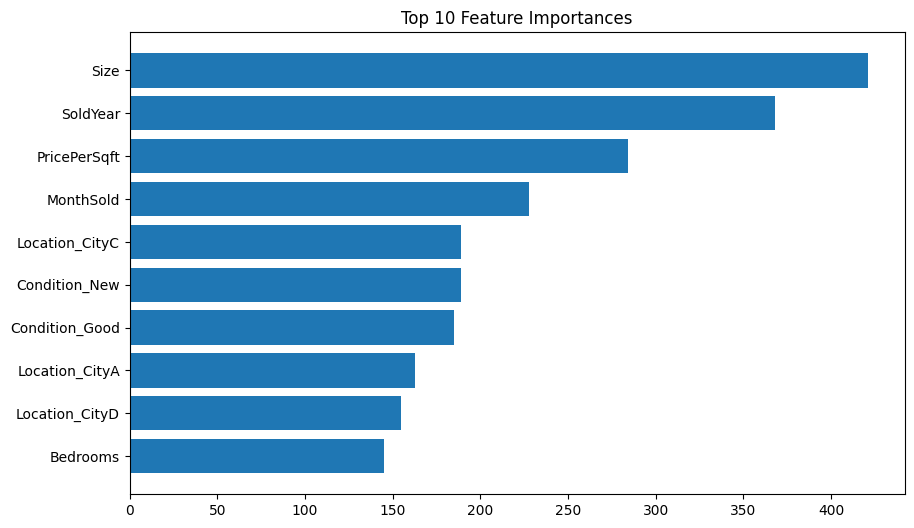

In [84]:
importances = lgb_model.feature_importances_
feat_names = X_train.columns

sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.barh(feat_names[sorted_idx][:10][::-1], importances[sorted_idx][:10][::-1])
plt.title("Top 10 Feature Importances")
plt.show()

In [79]:
## SAVE THE MODEL 
import pickle

# Assuming xgb_model is your best model
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)


In [81]:
X_train_filtered.columns

Index(['Bedrooms', 'Bathrooms', 'Size', 'YearBuilt', 'SoldYear', 'MonthSold',
       'TotalRooms', 'Condition_Fair', 'Condition_Good', 'Condition_New',
       'Condition_Poor', 'Location_CityA', 'Location_CityB', 'Location_CityC',
       'Location_CityD', 'Type_Condominium', 'Type_Single Family',
       'Type_Townhouse'],
      dtype='object')

#### Hyperparameter tuning :


In [66]:
# #random forest tuning:
# from sklearn.model_selection import RandomizedSearchCV
# rf_params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# rf_search = RandomizedSearchCV(
#     estimator=rf_model,
#     param_distributions=rf_params,
#     n_iter=20,
#     cv=5,
#     scoring='neg_root_mean_squared_error',
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# rf_search.fit(X_train, y_train)
# print("Best RF Params:", rf_search.best_params_)


In [67]:
# #xbg tuning : 
# xgb_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.05],
#     'max_depth': [6, 10],
#     'subsample': [0.6, 0.8],
#     'colsample_bytree': [0.6, 0.8],
#     'reg_alpha': [0, 0.1],
#     'reg_lambda': [1, 1.5]
# }

# new_xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# xgb_search = RandomizedSearchCV(
#     estimator=new_xgb_model,
#     param_distributions=xgb_params,
#     n_iter=10,
#     cv=3,
#     scoring='neg_root_mean_squared_error',
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# xgb_search.fit(X_train, y_train)
# print("Best XGB Params:", xgb_search.best_params_)

In [68]:
# lgb_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.05],
#     'max_depth': [6, 10],
#     'num_leaves': [15, 31],
#     'subsample': [0.6, 0.8],
#     'colsample_bytree': [0.6, 0.8],
#     'reg_alpha': [0, 0.1],
#     'reg_lambda': [1, 1.5]
# }

# lgb_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# lgb_search = RandomizedSearchCV(
#     estimator=lgb_model,
#     param_distributions=lgb_params,
#     n_iter=10,
#     cv=3,
#     scoring='neg_root_mean_squared_error',
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# lgb_search.fit(X_train, y_train)
# print("Best LGB Params:", lgb_search.best_params_)


In [69]:
# best_model = rf_search.best_estimator_  # or xgb_search.best_estimator_, lgb_search.best_estimator_

# y_pred = best_model.predict(X_test)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"Test RMSE (logscale): {rmse}")
# print(f"Test R2: {r2}")
